In [77]:
# Import Libraries and Load Dataset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker



import seaborn as sns

path = r'C:\Users\Tiishetso Mogoboya\Downloads\Documents\movies.csv'
df = pd.read_csv(path) #Load File
df.head(10) #Display first 10 rows

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.40,"123,000.00",Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,"550,000.00","39,754,601.00",Paramount Pictures,95.00
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.90,"188,000.00",John Landis,Dan Aykroyd,John Belushi,United States,"27,000,000.00","115,229,890.00",Universal Pictures,133.00
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.20,"330,000.00",Martin Scorsese,Jake LaMotta,Robert De Niro,United States,"18,000,000.00","23,402,427.00",Chartoff-Winkler Productions,129.00
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.80,"101,000.00",Richard Lester,Jerry Siegel,Gene Hackman,United States,"54,000,000.00","108,185,706.00",Dovemead Films,127.00
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.00,"10,000.00",Walter Hill,Bill Bryden,David Carradine,United States,"10,000,000.00","15,795,189.00",United Artists,100.00


In [78]:
# Data Overview
df.info() #Summary of the dataset
df.describe() #Descriptive statistics for numerical values
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


(7668, 15)

In [79]:
print(df.isnull().sum()) #Check for null colums
# Check for duplicate rows in the entire dataset
duplicates = df.duplicated()

# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()

# Display the duplicate rows
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicate_count}")
print("Duplicate rows:")
print(duplicate_rows)

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


In [80]:
# Handling missing values
df['rating'] = df['rating'].fillna('Unknown')  # Without inplace
df['writer'] = df['writer'].fillna('Unknown')
df['star'] = df['star'].fillna('Unknown')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['company'] = df['company'].fillna('Unknown')
df['score'] = df['score'].fillna(df['score'].median())
df['votes'] = df['votes'].fillna(df['votes'].median())
df['runtime'] = df['runtime'].fillna(df['runtime'].median())
df['budget'] = df['budget'].fillna(df['budget'].median())  # Without inplace
df.dropna(subset=['gross'], inplace=True)  # Drop missing gross values
print(df.isnull().sum()) #Check for null colums


name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


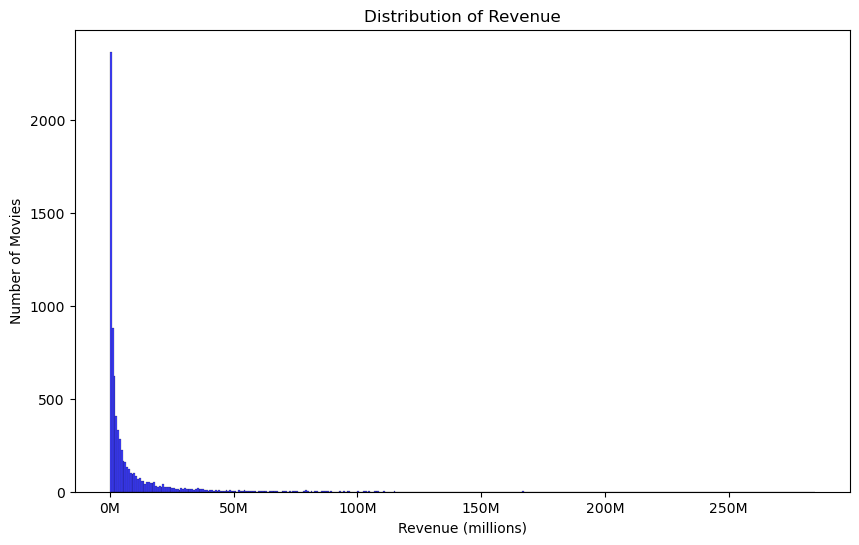

In [81]:
# Univariate Analysis


# Plot the distribution of movie revenues
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['gross'], color='b')

# Set title and labels
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (millions)')
plt.ylabel('Number of Movies')

# Format x-axis labels in multiples of 10 million (10M, 20M, etc.)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x/1e7:.0f}M'))  # Divide by 10M for display

plt.show()



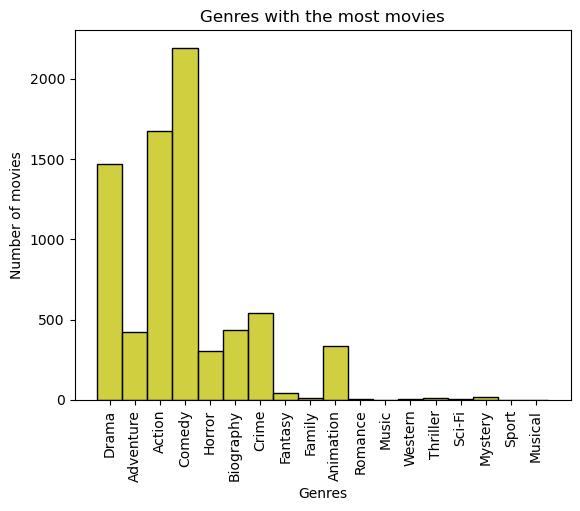

In [82]:
#Plot the count of movies by genres.
sns.histplot(df['genre'], color = 'y')
plt.title('Genres with the most movies')
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.xticks(rotation=90)  # Rotate x-axis labels by 180 degrees
plt.show()

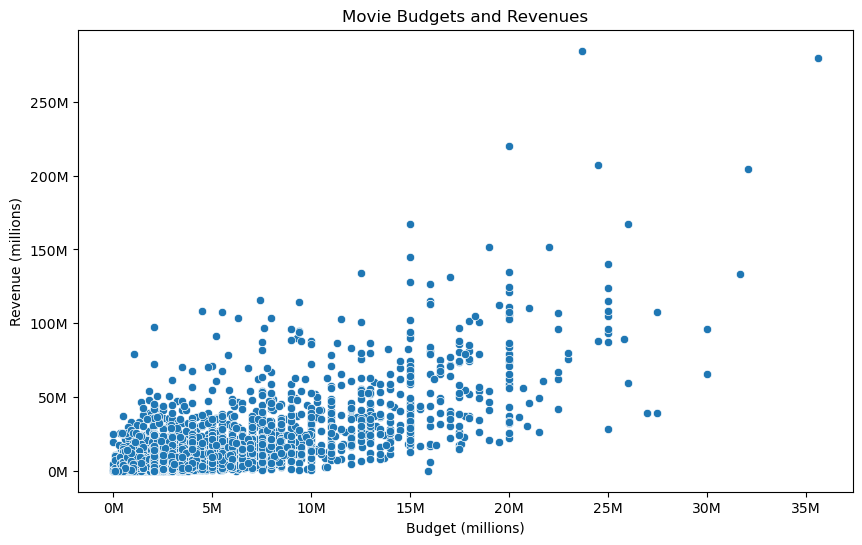

In [99]:
#a box plot to compare movie revenues across different genres
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='budget', y='gross', data=df)

# Set title and labels
plt.title('Movie Budgets and Revenues')
plt.xlabel('Budget (millions)')
plt.ylabel('Revenue (millions)')

# Format both x-axis and y-axis in multiples of 10 million (10M, 20M, etc.)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x/1e7:.0f}M'))  # X-axis formatting
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: f'{y/1e7:.0f}M'))  # Y-axis formatting

plt.show()

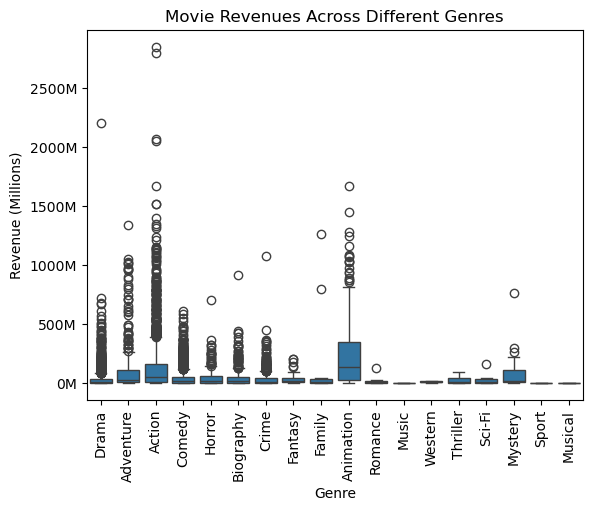

In [84]:
#a box plot to compare movie revenues across different genres
# Create the box plot
ax = sns.boxplot(x='genre', y='gross', data=df)

# Set the plot title and labels
plt.title('Movie Revenues Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Revenue (Millions)')

# Y-axis formatting: Format the y-axis to display revenue in millions
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M'))  # Adjusted to million formatting

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

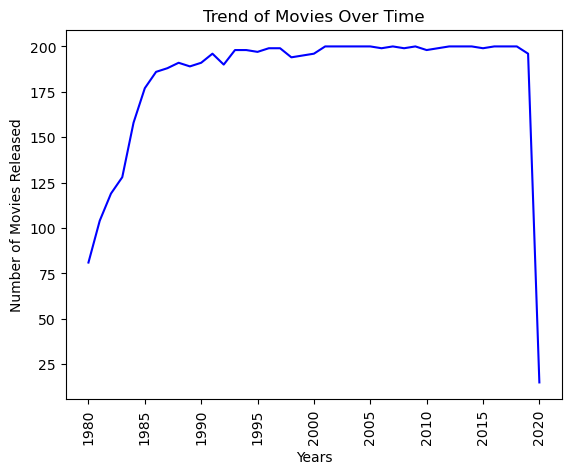

In [85]:
# Aggregating data: Number of movies released per year
yearly_counts = df['year'].value_counts().sort_index()  # Group and sort by year

# Plotting the trend
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, color='b')
plt.title('Trend of Movies Over Time')
plt.xlabel('Years')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()


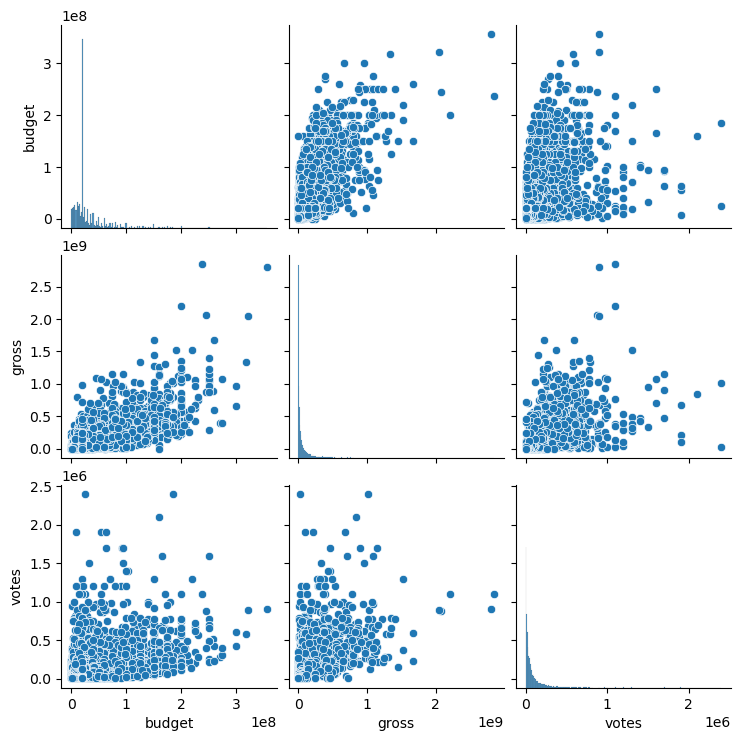

In [86]:


sns.pairplot(df[['budget', 'gross','votes']])
plt.show()

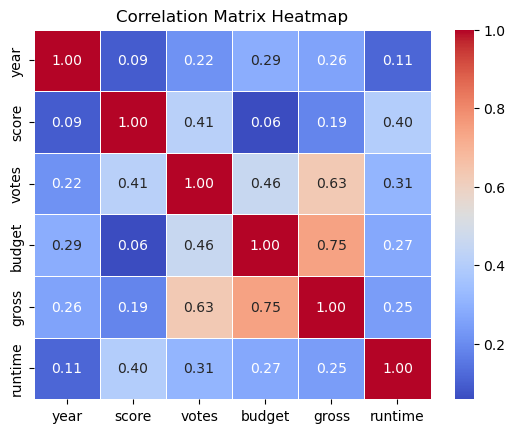

In [87]:


# Calculate the correlation matrix
data = df.select_dtypes(include='number')
corr_matrix = data.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()


In [88]:
df['profit'] = df['gross'] - df['budget'] # Create column profit
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00,"27,998,772.00"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00,"54,353,106.00"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00,"520,375,067.00"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00,"79,953,539.00"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00,"33,846,344.00"
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.40,"123,000.00",Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,"550,000.00","39,754,601.00",Paramount Pictures,95.00,"39,204,601.00"
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.90,"188,000.00",John Landis,Dan Aykroyd,John Belushi,United States,"27,000,000.00","115,229,890.00",Universal Pictures,133.00,"88,229,890.00"
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.20,"330,000.00",Martin Scorsese,Jake LaMotta,Robert De Niro,United States,"18,000,000.00","23,402,427.00",Chartoff-Winkler Productions,129.00,"5,402,427.00"
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.80,"101,000.00",Richard Lester,Jerry Siegel,Gene Hackman,United States,"54,000,000.00","108,185,706.00",Dovemead Films,127.00,"54,185,706.00"
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.00,"10,000.00",Walter Hill,Bill Bryden,David Carradine,United States,"10,000,000.00","15,795,189.00",United Artists,100.00,"5,795,189.00"


In [89]:
df['released_clean'] = df['released'].str.replace(r' \(.+\)', '', regex=True) #Remove non-date text
df['released_clean'] = pd.to_datetime(df['released_clean'], errors='coerce', format='%B %d, %Y').dt.year
df['released_clean'] = df['released_clean'].fillna(0).astype(int)



df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit,released_clean
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00,"27,998,772.00",1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00,"54,353,106.00",1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00,"520,375,067.00",1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00,"79,953,539.00",1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00,"33,846,344.00",1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.40,"2,400.00",Scott Teems,Scott Teems,Shea Whigham,United States,"20,500,000.00","3,661.00",Prowess Pictures,98.00,"-20,496,339.00",2020
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.60,"1,300.00",Teng Cheng,Unknown,Guangtao Jiang,China,"20,500,000.00","240,663,149.00",Beijing Enlight Pictures,110.00,"220,163,149.00",2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.00,294.00,Scott Pryor,Scott Pryor,Scott Pryor,United States,"20,500,000.00","413,378.00",Pryor Entertainment,120.00,"-20,086,622.00",2020
7657,Leap,Unknown,Drama,2020,"September 25, 2020 (United States)",6.70,903.00,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,"20,500,000.00","25,818,882.00",Unknown,135.00,"5,318,882.00",2020


In [90]:
df['title_length'] = df['name'].str.len()
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit,released_clean,title_length
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00,"27,998,772.00",1980,11
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00,"54,353,106.00",1980,15
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00,"520,375,067.00",1980,46
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00,"79,953,539.00",1980,9
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00,"33,846,344.00",1980,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.40,"2,400.00",Scott Teems,Scott Teems,Shea Whigham,United States,"20,500,000.00","3,661.00",Prowess Pictures,98.00,"-20,496,339.00",2020,10
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.60,"1,300.00",Teng Cheng,Unknown,Guangtao Jiang,China,"20,500,000.00","240,663,149.00",Beijing Enlight Pictures,110.00,"220,163,149.00",2020,21
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.00,294.00,Scott Pryor,Scott Pryor,Scott Pryor,United States,"20,500,000.00","413,378.00",Pryor Entertainment,120.00,"-20,086,622.00",2020,5
7657,Leap,Unknown,Drama,2020,"September 25, 2020 (United States)",6.70,903.00,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,"20,500,000.00","25,818,882.00",Unknown,135.00,"5,318,882.00",2020,4


In [94]:
highest_genres = df.groupby('genre')['budget'].sum().reset_index()
 #group by genre and budget
# Sort by Total Revenue in Descending Order and Get Top 3
top_3_products = highest_genres.sort_values(by='budget', ascending=False)
top_3_products

,genre,budget
0,Action,"88,022,413,068.00"
4,Comedy,"48,380,348,215.00"
6,Drama,"32,432,339,987.00"
2,Animation,"22,311,070,000.00"
1,Adventure,"16,935,060,000.00"
5,Crime,"11,939,556,080.00"
3,Biography,"10,393,079,768.00"
9,Horror,"4,464,567,000.00"
8,Fantasy,"729,700,000.00"
12,Mystery,"603,400,001.00"


In [95]:
highest_genres = df.groupby('genre')['gross'].sum().reset_index()
 #group by genre and budget
# Sort by Total Revenue in Descending Order and Get Top 3
top_3_products = highest_genres.sort_values(by='gross', ascending=False)
top_3_products

,genre,gross
0,Action,"243,435,855,754.00"
4,Comedy,"97,175,468,462.00"
2,Animation,"80,142,045,796.00"
6,Drama,"57,150,648,537.00"
1,Adventure,"45,916,596,693.00"
5,Crime,"21,355,448,322.00"
3,Biography,"20,729,581,801.00"
9,Horror,"14,543,329,602.00"
7,Family,"2,157,897,417.00"
12,Mystery,"2,023,670,554.00"


In [96]:
highest_genres = df.groupby('genre')['profit'].sum().reset_index()
 #group by genre and budget
# Sort by Total Revenue in Descending Order and Get Top 3
top_3_products = highest_genres.sort_values(by='profit', ascending=False)
top_3_products

,genre,profit
0,Action,"155,413,442,686.00"
2,Animation,"57,830,975,796.00"
4,Comedy,"48,795,120,247.00"
1,Adventure,"28,981,536,693.00"
6,Drama,"24,718,308,550.00"
3,Biography,"10,336,502,033.00"
9,Horror,"10,078,762,602.00"
5,Crime,"9,415,892,242.00"
7,Family,"1,809,897,417.00"
12,Mystery,"1,420,270,553.00"
